# **Hierarchical Clustering**

Bir kümeleme algoritmasıdır.

**Agglomerative** ve **Divisive** olmak üzere ikiye ayrılır.

**Agglomerative Hierarchical Clustering**'de,

1) Her bir data point bir küme haline getirilir.

2) En yakın iki data point bir cluster haline getirilir.

3) En yakın iki küme tek bir küme haline getirilir.

4) Bu işlem tek bir küme elde ediline kadar devam eder.

**Divisive Hierarchical Clustering**'de,

Başlangıçta tüm data pointler tek bir kümededir.

Uzaklık matrisine göre pointler ana kümeden ayrılarak alt kümeler oluşturulur.

En sonda her bir data point tek bir küme haline getirilir.



İki nokta arasındaki mesafeyi hesaplamak için çeşitli yöntemler vardır.

**Single Linkage** :  İki kümenin en yakın iki noktasına göre mesafeyi hesaplar. Dezavantajı, işlemlerin uzun sürmesidir.

**Complete Linkage** : İki kümenin en uzak iki noktasına göre mesafeyi hesaplar.Dezavantajı, veri setindeki uç noktalara karşı duyarlı olmasıdır.

**Average Linkage** : İki küme arasındaki mean'e göre mesafeyi hesaplar. Single Linkage ve Complete Linkage arasında uygun bir yöntemdir.

**Centroid Linkage** : İki küme arasındaki centroid'e göre mesafeyi hesaplar.

**Ward Linkage** : Minimum varyans değerine sahip olan kümeler birleştirilir.

**Median Linkage** : İki küme arasındaki median'a göre mesafeyi hesaplar

**Dendogram** : Hierarchical Clustering'in steplerini gösteren görselleştirme tekniğidir.

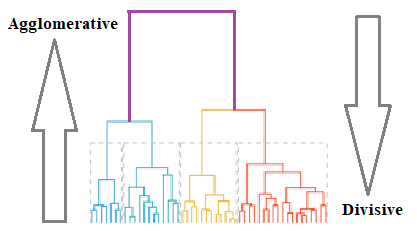

İki küme arasındaki mesafe fazla olduğunda, y ekseni euclidean distance olduğundan daha yukarıda birleştirilir.

Dendogramda distance threshold belirlenir. 

Threshold değeri intuitive şekilde belirlenebilir.

Threshold değerine x eksenine paralel olacak şekilde bir çizgi çekilir.

Bu çizgiyi kesen kaç nokta varsa o kadar küme vardır.

Threshold belirlenerek benzerlik oranı üzerinden yorumlama yapılabilir. Benzerlik oranı 1'den büyük olanlar alınmasın denildiğinde zaman threshold 1 değerine bakılır ve kaç nokta kestiyse o noktalar alınır.

Dendogramdaki en yüksek distance'a göre threshold koyulması en uygundur.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Numpy kütüphanesi kullanılarak bir dataset hazırlanmıştır.

3 farklı class'tan oluşan bir dataset oluşturulur.

In [ ]:
# class1
x1 = np.random.normal(25,5,100) #25 ortalamaya, 5 sigmaya sahip 100 değer üretir.
y1 = np.random.normal(25,5,100) #datanın %66'sı (25+5)30 ile (25-5)20 değerleri arasında olur.
                                #bu dağılım gaussian(normal) dağılımdır.
# class2
x2 = np.random.normal(55,5,100)
y2 = np.random.normal(60,5,100)

# class3
x3 = np.random.normal(55,5,100)
y3 = np.random.normal(15,5,100)

In [ ]:
x = np.concatenate((x1,x2,x3),axis = 0) #axis=0 sütunu birleştirilir.
y = np.concatenate((y1,y2,y3),axis = 0) #x1, x2, x3 featureları x ekseninde, y1,y2,y3 featureları y ekseninde birleştirilir.

In [ ]:
dictionary = {"x":x,"y":y}       #dictionary oluşturulur.

In [ ]:
data = pd.DataFrame(dictionary)  #oluşturulan dictionary dataframe'e dönüştürülür.

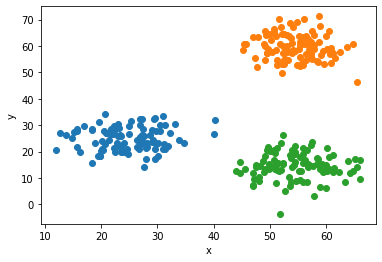

In [ ]:
plt.scatter(x1,y1)               
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

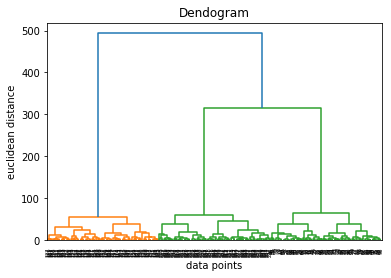

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram  #linkage dendogram çizdirilirken kullanılacak mesafeyi hesaplama yöntemidir.

merg = linkage(data, method="ward") #ward linkage kullanılmıştır.
dendrogram(merg, leaf_rotation=90)  #leaf_rotation data point değerleri 90 derecelik açıyla yazılır.
                                    
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.title("Dendogram")
plt.show()

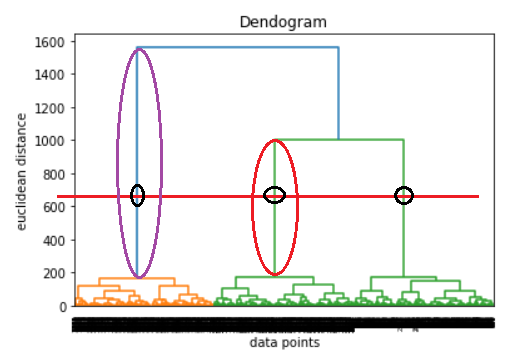

Kırmızı circle ve mor circle iki küme arası uzak mesafelerdir.

Ancak mor circle'ı kesen bir yatay çizgi vardır. Bu yüzden threshold için uygun değildir.

Bu yüzden kırmızı circle threshold için uygundur.

Siyah circle'lar dendogramda threshold'u kesen değerlerdir. Threshold 3 yerde kesmiştir. Bu durumda datanın ayrılabileceği en mantıklı küme sayısı 3'tür.



Aşağıda Hierarchical Clustering kodu yazılmıştır.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_clustering = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
#threshold'a bakarak 3 kümeye ayrılacağı belirlendi. Bu yüzden n_cluster sayısı 3'tür.
#iki nokta arası uzaklık euclidean distance'a göre ward linkage yöntemi kullanılacaktır..
cluster = hierarchical_clustering.fit_predict(data)

In [ ]:
data["label"] = cluster

In [ ]:
data.head()

,x,y,label
0,23.340257,21.820396,0
1,24.519281,20.763736,0
2,27.222990,24.000221,0
3,34.718251,23.282239,0
4,22.466770,19.933864,0


Datada artık label oluşturulmuştur.

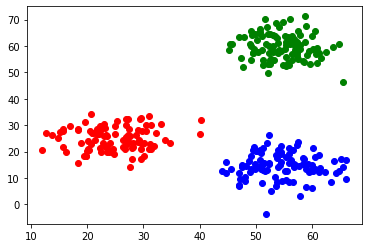

In [ ]:
plt.scatter(data.x[data.label==0], data.y[data.label==0], color="red")
plt.scatter(data.x[data.label==1], data.y[data.label==1], color="green")
plt.scatter(data.x[data.label==2], data.y[data.label==2], color="blue")
plt.show()

Data 3 farklı cluster'a ayrılmıştır.